<a href="https://colab.research.google.com/github/pharringtonp19/housing-and-homelessness/blob/main/notebooks/PIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Download Data**

In [ ]:
!wget "https://www.huduser.gov/portal/sites/default/files/xls/2007-2024-PIT-Counts-by-State.xlsb"

--2025-08-28 19:31:50--  https://www.huduser.gov/portal/sites/default/files/xls/2007-2024-PIT-Counts-by-State.xlsb
Resolving www.huduser.gov (www.huduser.gov)... 3.20.101.100, 18.223.37.198
Connecting to www.huduser.gov (www.huduser.gov)|3.20.101.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2224540 (2.1M) [application/vnd.ms-excel.sheet.binary.macroEnabled.12]
Saving to: ‘2007-2024-PIT-Counts-by-State.xlsb’

2007-2024-PIT-Count 100%[===================>]   2.12M  2.00MB/s    in 1.1s    

2025-08-28 19:31:52 (2.00 MB/s) - ‘2007-2024-PIT-Counts-by-State.xlsb’ saved [2224540/2224540]



### **Install Libraries**

In [ ]:
!pip install pyxlsb

### **Import Libraries**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import userdata
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### **Read In Data**

In [ ]:
results = []
years = np.arange(2007, 2025)
years = list(years)
years.remove(2021)
years = np.array(years)
for year in years:
  df = pd.read_excel('2007-2024-PIT-Counts-by-State.xlsb', sheet_name=str(year))
  condition = df['State'] == 'Total'
  new_df = df[condition]
  num = new_df['Overall Homeless'].values.item()
  results.append(num)

### **Plot**

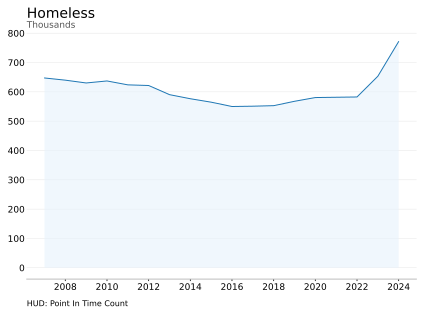

In [ ]:
x = pd.to_datetime(years, format='%Y')
y = np.array(results) / 1e3

# --- NYT-style colors ---
line_color = '#1f77b4'
fill_color = "#e6f1fb"
forecast_fill = "#dfeaf7"
grid_color = '#e6e6e6'

fig, ax = plt.subplots(figsize=(7, 4.5), dpi=300)
ax.set_facecolor("white")
fig.patch.set_facecolor("white")

# area + line
ax.fill_between(x, 0, y, color=fill_color, linewidth=0, zorder=1, alpha=0.6)
ax.yaxis.grid(True, color=grid_color, linewidth=.5, zorder=2)
ax.plot(x, y, color=line_color, linewidth=1, zorder=3,
        solid_capstyle="round", solid_joinstyle="round")

# spines & ticks (keep only a subtle bottom spine)
for side in ("top", "left", "right"):
    ax.spines[side].set_visible(False)
ax.spines["bottom"].set_color("#bdbdbd")
ax.spines["bottom"].set_linewidth(1)

ax.tick_params(axis="x", length=2, labelsize=9, pad=2)
ax.tick_params(axis="y", length=0, labelsize=9, pad=2)


# tidy limits
ax.set_axisbelow(True)            # any future gridlines stay behind

# title + subtitle (left-aligned)
ax.text(0., 1.05, s='Homeless', transform=ax.transAxes, size=14)
ax.text(0, 1.01, "Thousands", transform=ax.transAxes,
        fontsize=9, color="#555555")

ax.annotate("HUD: Point In Time Count",
        xy = (0., -0.1),
        xycoords='axes fraction',
        ha='left',
        va="center",
        fontsize=8)

plt.ticklabel_format(style='plain', axis='y')  # <- disable sci notation on y-axis

fig.savefig("homelessness.png", bbox_inches="tight", dpi=300)
plt.show()